## IPL Data Analysis Hackathon, November 2023

### Innomatics Research Lab

### Intern: Khushboo Singh

### Business Case: To perform analysis on IPL Matches recorded between 2008 to 2019.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Load the data
data_deliever=pd.read_csv('deliveries.csv')
data_deliever

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [4]:
data1=pd.read_csv('matches.csv')
data1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### Basic Checks

In [6]:
data_deliever.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
data_deliever.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
data1.tail()

In [9]:
data_deliever.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
data1.describe()

In [10]:
data_deliever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
data_deliever.shape

(179078, 21)

In [15]:
data1.shape

(756, 18)

In [16]:
data_deliever.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [17]:
data1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [18]:
data3= data1.drop(columns=['umpire3'], axis=1)

In [19]:
data3.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


* Which of the following is the right way to merge 2 datasets for getting better insights from the data?

In [91]:
merged_data = pd.merge(data_deliever,data1, left_on='match_id', right_on='id', how='inner')
merged_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [90]:

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

* City which hosted most number of seasons according to the data is?

In [103]:
city_season = merged_data.groupby(['city', 'season'])['id'].count()


most_seasons_city = city_season.groupby('city').count().idxmax()
most_seasons_count = city_season.groupby('city').count().max()

print(f"The city that hosted the most number of seasons is {most_seasons_city} with {most_seasons_count} seasons.")

The city that hosted the most number of seasons is Delhi with 11 seasons.


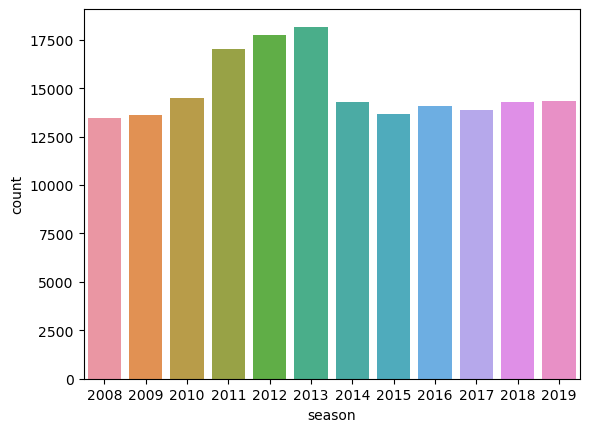

In [74]:
sns.countplot(x='season', data=merged_data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

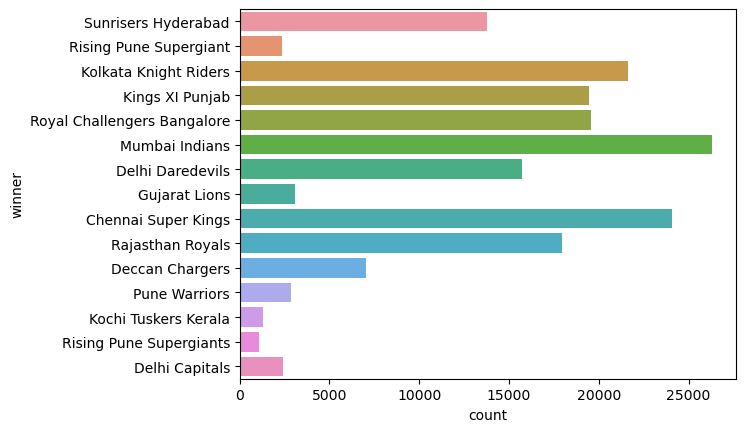

In [75]:
sns.countplot(y='winner', data = merged_data)
plt.show

<Axes: xlabel='count', ylabel='winner'>

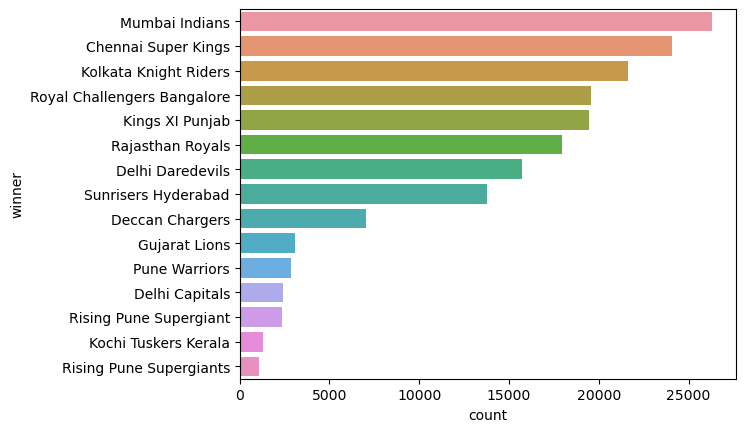

In [76]:
data4 = merged_data.winner.value_counts()
sns.barplot(y = data4.index, x = data4, orient='h')

In [77]:
teams_per_season = merged_data.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               3094
        Kings XI Punjab                2303
        Chennai Super Kings            2127
        Delhi Daredevils               1641
        Mumbai Indians                 1509
                                       ... 
2019    Kings XI Punjab                1466
        Kolkata Knight Riders          1431
        Sunrisers Hyderabad            1426
        Royal Challengers Bangalore    1236
        Rajasthan Royals               1216
Name: count, Length: 100, dtype: int64

* Maximum wins by Mumbai Indians in 2011 are

In [79]:
mumbai_indians_2011 = data3[(data3['winner'] == 'Mumbai Indians') & (data3['season'] == 2011)]
max_wins = mumbai_indians_2011.shape[0]
print("Maximum wins by Mumbai Indians in 2011:", max_wins)

Maximum wins by Mumbai Indians in 2011: 10


<Axes: xlabel='season', ylabel='toss_decision'>

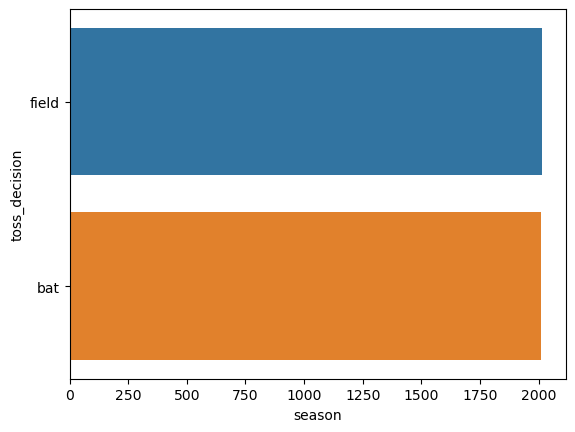

In [80]:
sns.barplot(x='season',y='toss_decision',data=merged_data)

* What is the percentage of getting bat and field in feature 'toss_descision'?

In [81]:
total_matches_ = len(merged_data)
batting_percentage = (merged_data['toss_decision'].value_counts(normalize=True) * 100).get('bat', 0)
fielding_percentage = (merged_data['toss_decision'].value_counts(normalize=True) * 100).get('field', 0)

print(f"Percentage of getting batting: {batting_percentage:.2f}%")
print(f"Percentage of getting fielding: {fielding_percentage:.2f}%")

Percentage of getting batting: 39.01%
Percentage of getting fielding: 60.99%


In [82]:
field_wins = data3[(data3['toss_decision'] == 'field') & (data3['toss_winner'] == data3['winner'])].shape[0]
bat_wins = data3[(data3['toss_decision'] == 'bat') & (data3['toss_winner'] == data3['winner'])].shape[0]

* Which statement holds true?

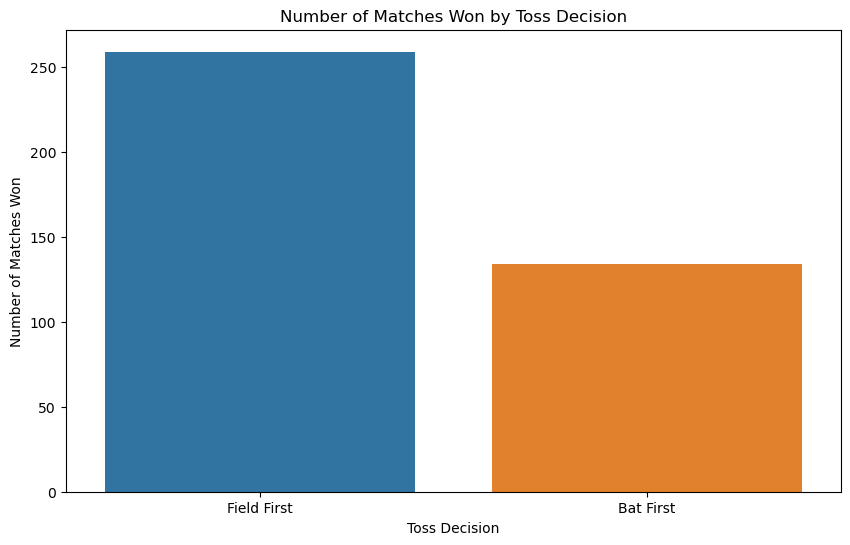

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Field First', 'Bat First'], y=[field_wins, bat_wins])
plt.title('Number of Matches Won by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches Won')
plt.show()

In [83]:
print(f"Matches won after choosing to field first: {field_wins}")
print(f"Matches won after choosing to bat first: {bat_wins}")

Matches won after choosing to field first: 259
Matches won after choosing to bat first: 134


In [84]:
if field_wins > bat_wins:
    print("Teams winning tosses and electing to field first have won more number of matches.")
elif bat_wins > field_wins:
    print("Teams winning tosses and electing to bat first have won more number of matches.")
else:
    print("The number of matches won after choosing to field first and bat first are equal.")

Teams winning tosses and electing to field first have won more number of matches.


* In which years where taking batting second have won more number of matches?

In [85]:
bat_second_wins = data3[data3['toss_decision'] == 'field'][data3['toss_winner'] == data3['winner']]


bat_second_wins_year = bat_second_wins['season'].value_counts().sort_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16524\4057541638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bat_second_wins = data3[data3['toss_decision'] == 'field'][data3['toss_winner'] == data3['winner']]


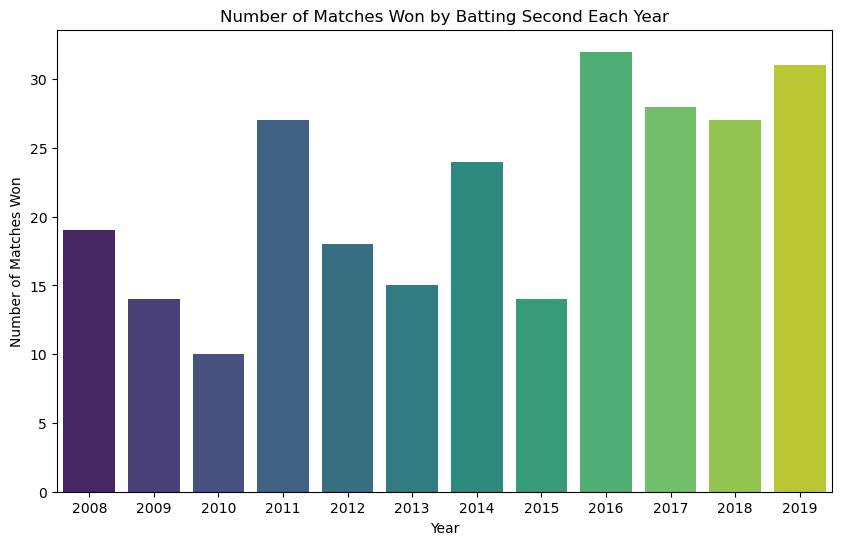

Number of Matches Won by Batting Second Each Year:
season
2008    19
2009    14
2010    10
2011    27
2012    18
2013    15
2014    24
2015    14
2016    32
2017    28
2018    27
2019    31
Name: count, dtype: int64


In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bat_second_wins_year.index, y=bat_second_wins_year.values, palette='viridis')
plt.title('Number of Matches Won by Batting Second Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches Won')
plt.show()
print("Number of Matches Won by Batting Second Each Year:")
print(bat_second_wins_year)

* In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [102]:
runs_6s_4s = merged_data[(merged_data['season'] == 2019) & ((merged_data['batsman_runs'] == 4) | (merged_data['batsman_runs'] == 6))]

runs_6s_4s_counts = runs_6s_4s.groupby('batsman')['batsman_runs'].sum()

highest_runs_batsman = runs_6s_4s_counts.idxmax()
highest_runs_count = runs_6s_4s_counts.max()

print(f"In 2019, the batsman who scored the highest number of runs by hitting 6's and 4's is {highest_runs_batsman} with {highest_runs_count} runs.")

In 2019, the batsman who scored the highest number of runs by hitting 6's and 4's is AD Russell with 438 runs.


In [87]:
data_2019 = merged_data[merged_data['season'] == 2019]


highest_scorer_2019 = data_2019.loc[data_2019['win_by_runs'].idxmax()]


highest_scorer_2019 = data_2019.loc[data_2019['win_by_runs'].idxmax()]

# Display the result
print(f"The batsman who scored the highest number of runs in 2019 is {highest_scorer_2019['player_of_match']} with {highest_scorer_2019['win_by_runs']} runs.")

The batsman who scored the highest number of runs in 2019 is J Bairstow with 118 runs.


* Most number of wickets taken by a bowler is?

In [101]:
wickets = merged_data[merged_data['dismissal_kind'].notnull()]


wickets_counts = wickets['bowler'].value_counts()


most_wickets_bowler = wickets_counts.idxmax()
most_wickets_count = wickets_counts.max()


print(f"The bowler who took the most number of wickets is {most_wickets_bowler} with {most_wickets_count} wickets.")

The bowler who took the most number of wickets is SL Malinga with 188 wickets.


In [47]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

* What is the strike rate of Kohli in 2016?

In [92]:

kohli_2016 = merged_data[(merged_data['batsman'] == 'Virat Kohli') & (merged_data['season'] == 2016)]
# Calculate the strike rate
total_runs = kohli_2016['batsman_runs'].sum()
total_balls_faced = len(kohli_2016)

strike_rate = (total_runs / total_balls_faced) * 100

# Display the result
print(f"Virat Kohli's strike rate in 2016: {strike_rate:.2f}")

Virat Kohli's strike rate in 2016: nan


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16524\1124418139.py:6: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (total_runs / total_balls_faced) * 100


* Bowlers with maximum number of extras?

In [100]:
extras_bowled = merged_data[merged_data['extra_runs'] > 0]


extras_counts = extras_bowled.groupby('bowler')['extra_runs'].sum()


max_extras_bowlers = extras_counts[extras_counts == extras_counts.max()]


print("Bowlers with the maximum number of extras:")
print(max_extras_bowlers)

Bowlers with the maximum number of extras:
bowler
SL Malinga    293
Name: extra_runs, dtype: int64


In [93]:
venue_counts = merged_data['venue'].value_counts()

# Find the venue with the most number of matches
most_hosted_venue = venue_counts.idxmax()
most_matches_count = venue_counts.max()

* Which venue has hosted most number of IPL matches?

In [94]:
print(f"The venue that has hosted the most number of IPL matches is '{most_hosted_venue}' with {most_matches_count} matches.")

The venue that has hosted the most number of IPL matches is 'Eden Gardens' with 17991 matches.


* In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [95]:
match = merged_data[(merged_data['team1'] == 'Sunrisers Hyderabad') & 
                        (merged_data['team2'] == 'Royal Challengers Bangalore') & 
                        (merged_data['season'] == 2017)]

# Get the Player of the Match for that specific match
player_of_the_match = match['player_of_match'].values[0]

# Display the result
print(f"In the 2017 match between Sunrisers Hyderabad and Royal Challengers Bangalore, the Player of the Match was {player_of_the_match}.")

In the 2017 match between Sunrisers Hyderabad and Royal Challengers Bangalore, the Player of the Match was Yuvraj Singh.


* Across seasons who are the top three batsman's with most number of run out?

In [96]:
run_out= merged_data[merged_data['dismissal_kind'] == 'run out']

run_out_counts = run_out['batsman'].value_counts()

top_three_batsmen_run_out = run_out_counts.head(3)

print("Top three batsmen with the most run-outs across seasons:")
print(top_three_batsmen_run_out)

Top three batsmen with the most run-outs across seasons:
batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: count, dtype: int64


* What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [97]:
kohli_bumrah = merged_data[(merged_data['batsman'] == 'Virat Kohli') & (merged_data['bowler'] == 'JJ Bumrah')]

total_runs_by_kohli_bumrah = kohli_bumrah['batsman_runs'].sum()


print(f"Total runs scored by Virat Kohli against JJ Bumrah: {total_runs_by_kohli_bumrah}")

Total runs scored by Virat Kohli against JJ Bumrah: 0


* Across all seasons which player was dismissed the maximum number of times via caught and bowled?

In [98]:
caught_bowled = merged_data[merged_data['dismissal_kind'] == 'caught and bowled']


dismissals = caught_bowled['player_dismissed'].value_counts()


max_dismissals_player = dismissals.idxmax()
max_dismissals_count = dismissals.max()



print(f"The player dismissed the maximum number of times via 'caught and bowled' is {max_dismissals_player} with {max_dismissals_count} dismissals.")

The player dismissed the maximum number of times via 'caught and bowled' is SK Raina with 7 dismissals.


* Which player has the highest hard-hitting ability?

In [99]:
strike_rate = data_deliever.groupby('batsman')['batsman_runs'].mean() / data_deliever.groupby('batsman')['ball'].mean()*100


highest_strike_rate_player = strike_rate.idxmax()
highest_strike_rate = strike_rate.max()


print(f"The player with the highest hard-hitting ability (based on average strike rate) is {highest_strike_rate_player} with a strike rate of {highest_strike_rate:.2f}.")

The player with the highest hard-hitting ability (based on average strike rate) is S Sharma with a strike rate of 80.00.
